# Analysis and Final Remarks

## Abstract

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### CSV Read-in

In [2]:
df = pd.read_csv("../data/labeled.csv")
df.head()

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,...,key_tone_E,key_tone_F,key_tone_F#,key_tone_G,key_tone_G#,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,label
0,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5n9QFM4EiMeLGO0Mbwaqov,1.0,Everything's Different Now,236733.0,1.0,0.672,...,0,0,0,0,0,0,0,1,0,4
1,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0BKslA1XqG8HBUKBl4d7EN,2.0,Rip In Heaven,211200.0,1.0,0.612,...,1,0,0,0,0,0,0,1,0,12
2,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5G7NBdQLHc7GkehNmLG3yJ,3.0,Why Must I,221000.0,1.0,0.586,...,0,0,0,0,0,0,0,1,0,13
3,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0J6nZDgEuwXtECq8Pukn1n,4.0,J For Jules,265493.0,1.0,0.475,...,0,0,0,0,0,0,0,1,0,4
4,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,3Lm7hSTabr01oav0WdSsuD,5.0,(Believed You Were) Lucky,216973.0,1.0,0.612,...,0,1,0,0,0,0,0,1,0,10


In [106]:
df.shape

(98337, 23)

#### Undummy

##### Helper Function

In [3]:
def undummy(df, dummies, first_dropped=True, dropped=None):
    '''
    Given a DataFrame and list of dummy columns for one category, returns a collaposed categorical series.
    
    inputs:
    df: DataFrame that contains dummies
    dummies: list of dummy columns for one category
    first_dropped: Expects boolean, True indicates that the dummies have an inferred value, False indicates no categories are inferred.  Defaults to True.
    dropped: Expects string, if there is an inferred category, this should be the categorie's value without the dummy prefix
    
    outputs:
    None if first_dropped is True but the dropped category isn't given
    Otherwise returns a pandas series that has the categories as values
    '''
    delimiter_index = dummies[0].rindex("_")
    ##Undummy first
    if first_dropped:
        #Check dependent arguement
        if not dropped:
            print("Give the dropped dummy if first was dropped!")
            return
        else:
            #We can do this easily by row wise summing the dummy columns, anything with 0 is the inferred dummy column
            #flipping the 0 and 1s is a matter of just doing 1 - Series
            dummy_name = dummies[0][:delimiter_index+1] + dropped
            df[dummy_name] = 1 - df[dummies].sum(axis=1)
            dummies.append(dummy_name) #for rest of manipulation
    
    #Easiest to understand this one from inside out
    #the np.where first finds the position row wise for any column that is 1, or is true valued
    #this then used as an index for the .columns attribute to fetch the appropriate dummy column head
    #Take this list, then make it a series
    dummy_series = pd.Series(df[dummies].columns[np.where(df[dummies]==1)[1]])
    
    #dynamically drop prefix
    dummy_series = dummy_series.map(lambda x: x[delimiter_index+1:])
    return dummy_series

##### Undummying

In [4]:
dummies = ['key_tone_A#',
       'key_tone_B', 'key_tone_C', 'key_tone_C#', 'key_tone_D', 'key_tone_D#',
       'key_tone_E', 'key_tone_F', 'key_tone_F#', 'key_tone_G', 'key_tone_G#',]

In [5]:
df["key"] = undummy(df, dummies, dropped="A")
df.drop(columns=dummies,inplace=True)

In [6]:
dummies = ['time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0']

In [7]:
df["time_signature"] = undummy(df, dummies, dropped="0.0").astype(float).astype(int).astype(str)
df.drop(columns=dummies, inplace=True)

In [8]:
df.head()

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,...,is_major,speechiness,acousticness,valence,tempo,is_live,is_instrumental,label,key,time_signature
0,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5n9QFM4EiMeLGO0Mbwaqov,1.0,Everything's Different Now,236733.0,1.0,0.672,...,1.0,0.0393,0.0693,0.730,123.777,0,0,4,A#,4
1,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0BKslA1XqG8HBUKBl4d7EN,2.0,Rip In Heaven,211200.0,1.0,0.612,...,1.0,0.0351,0.4280,0.815,131.809,0,0,12,E,4
2,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5G7NBdQLHc7GkehNmLG3yJ,3.0,Why Must I,221000.0,1.0,0.586,...,1.0,0.0268,0.2290,0.838,96.486,0,0,13,C#,4
3,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0J6nZDgEuwXtECq8Pukn1n,4.0,J For Jules,265493.0,1.0,0.475,...,1.0,0.0308,0.4620,0.262,151.651,0,0,4,A#,4
4,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,3Lm7hSTabr01oav0WdSsuD,5.0,(Believed You Were) Lucky,216973.0,1.0,0.612,...,1.0,0.0321,0.4480,0.495,124.315,0,0,10,F,4


#### Retrieving Liveness and Instrumentalness

In [14]:
feats_df = pd.read_csv("../data/raw/track_features.csv")
feats_df.head()

,track_id,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5n9QFM4EiMeLGO0Mbwaqov,0.672,0.455,10.0,1.0,0.0393,0.0693,0.000033,0.1080,0.730,123.777,4.0
1,0BKslA1XqG8HBUKBl4d7EN,0.612,0.615,4.0,1.0,0.0351,0.4280,0.000000,0.3470,0.815,131.809,4.0
2,5G7NBdQLHc7GkehNmLG3yJ,0.586,0.670,1.0,1.0,0.0268,0.2290,0.000035,0.3230,0.838,96.486,4.0
3,0J6nZDgEuwXtECq8Pukn1n,0.475,0.355,10.0,1.0,0.0308,0.4620,0.000001,0.1190,0.262,151.651,4.0
4,3Lm7hSTabr01oav0WdSsuD,0.612,0.523,5.0,1.0,0.0321,0.4480,0.000002,0.0727,0.495,124.315,4.0


In [16]:
feats_df = feats_df[["track_id", "instrumentalness", "liveness"]]

In [18]:
df = pd.merge(df, feats_df, how="left", left_on="track_id", right_on="track_id")

In [ ]:
df.drop(columns=[])

## Analysis

### So what are these labels/clusters?

Firstly, I would like to talk about what the clustering theoretically represents.  For most people, they think of genres as types of music that describe how music sounds.  This is not untrue, but a genre really captures much more than just that: there is a whole cultural aspect or _ethos_ often associated with them.  Punk is the canonical example, most people are familiar with which not only describes short, fast, and aggressive songs that rely simple harmonic progressions of a few power chords.  Punk also generally entails some kind of counterculture or rebellion inherent in the music.  While theoretically on the cutting edge someone could perhaps try to build a speech to text model that then tries to assess the sentiment via Natural Language Processing, that latter aspect is not really part of the 'sound' of punk, but has obvious deep connections.  
Perhaps a more recent example is the rise of Vaporwave. Methodically, it describes making music by generally taking samples from showa era city pop and remixing them with a set of specific techniques, usually layering and slowing down the tempo while inserting loops.  But vaporwave has its own ethos that is often called and stylized as ＡＥＳＴＨＥＴＩＣＳ, which permeates the meta-elements of the music with a pastiche of 80-90s design and consumerism.  While this is reflected in the choice of samples used, it still might not really be evident in just listening to a song out of that context.  
Genres are pretty important because they can capture the history or culture of a movement, but people seem to be content with them as the only classification of music sometimes.  This clustering is an attempt at creating another way to categorize music based more on aural qualities.  By no means am I trying to replace genres, but just offer another axis of comparison.  With that in mind, for my own work I will refer to these clusters as aural palettes.  Theoretically these are aural qualities that form building blocks for songs, and the subset used can be thought of as the palette used in constructing that song.

First thing I am interested in is the distribution of certain features among these new aural palettes.

### Time Signature

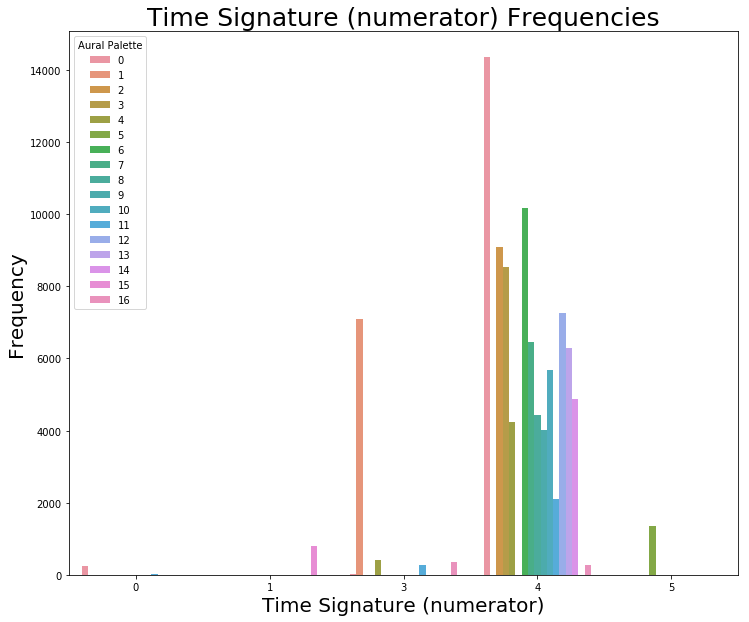

In [103]:
plt.figure(figsize=(12,10))
sns.countplot(x="time_signature", data=df, hue="label")
plt.xlabel("Time Signature (numerator)",size=20)
plt.ylabel("Frequency",size=20)
plt.title("Time Signature (numerator) Frequencies", size=25)
plt.legend(title="Aural Palette")

### Key Center

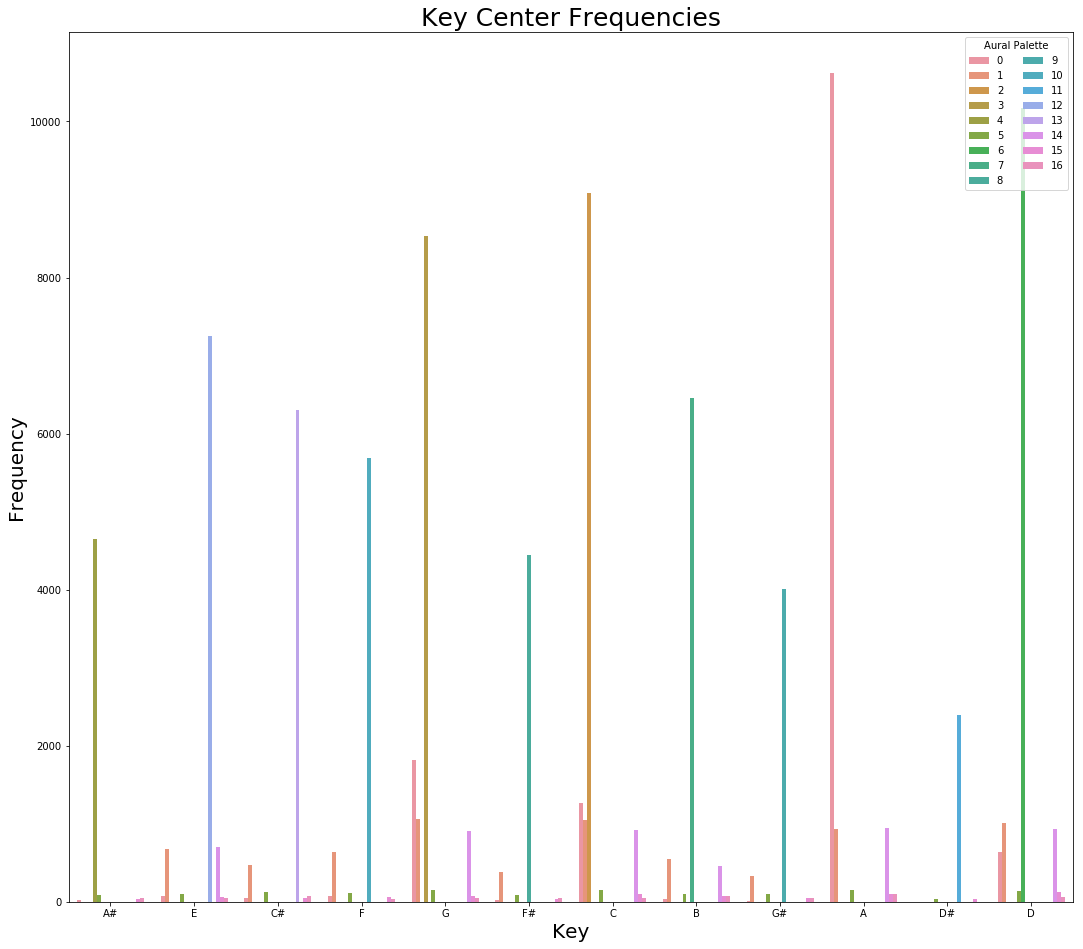

In [20]:
plt.figure(figsize=(18,16))
sns.countplot(x="key",data=df, hue="label")
plt.xlabel("Key",size=20)
plt.ylabel("Frequency",size=20)
plt.title("Key Center Frequencies", size=25)
plt.legend(title="Aural Palette",ncol=2)

Each palette has an extremely dominant Key center!  That is both expected but pretty neat.  Compare with the key center graph below:

Text(0.5, 1.0, 'Key Center Frequencies')

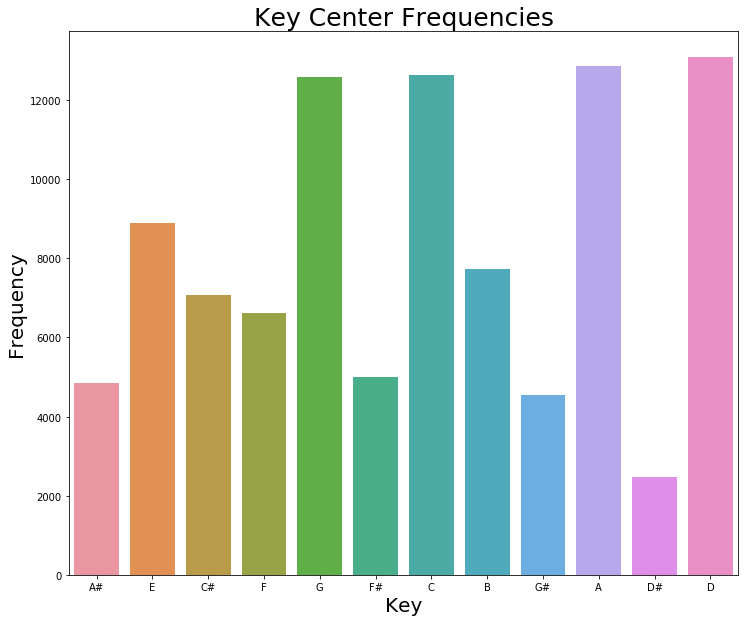

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(x="key",data=df)
plt.xlabel("Key",size=20)
plt.ylabel("Frequency",size=20)
plt.title("Key Center Frequencies", size=25)

We can see that distribution does not seem to be holding up for each palette individually.

Next step would be breaking down by major/minor modes

#### Major/Minor

In [72]:
keys = list(set(df.key.values))
keys.sort()

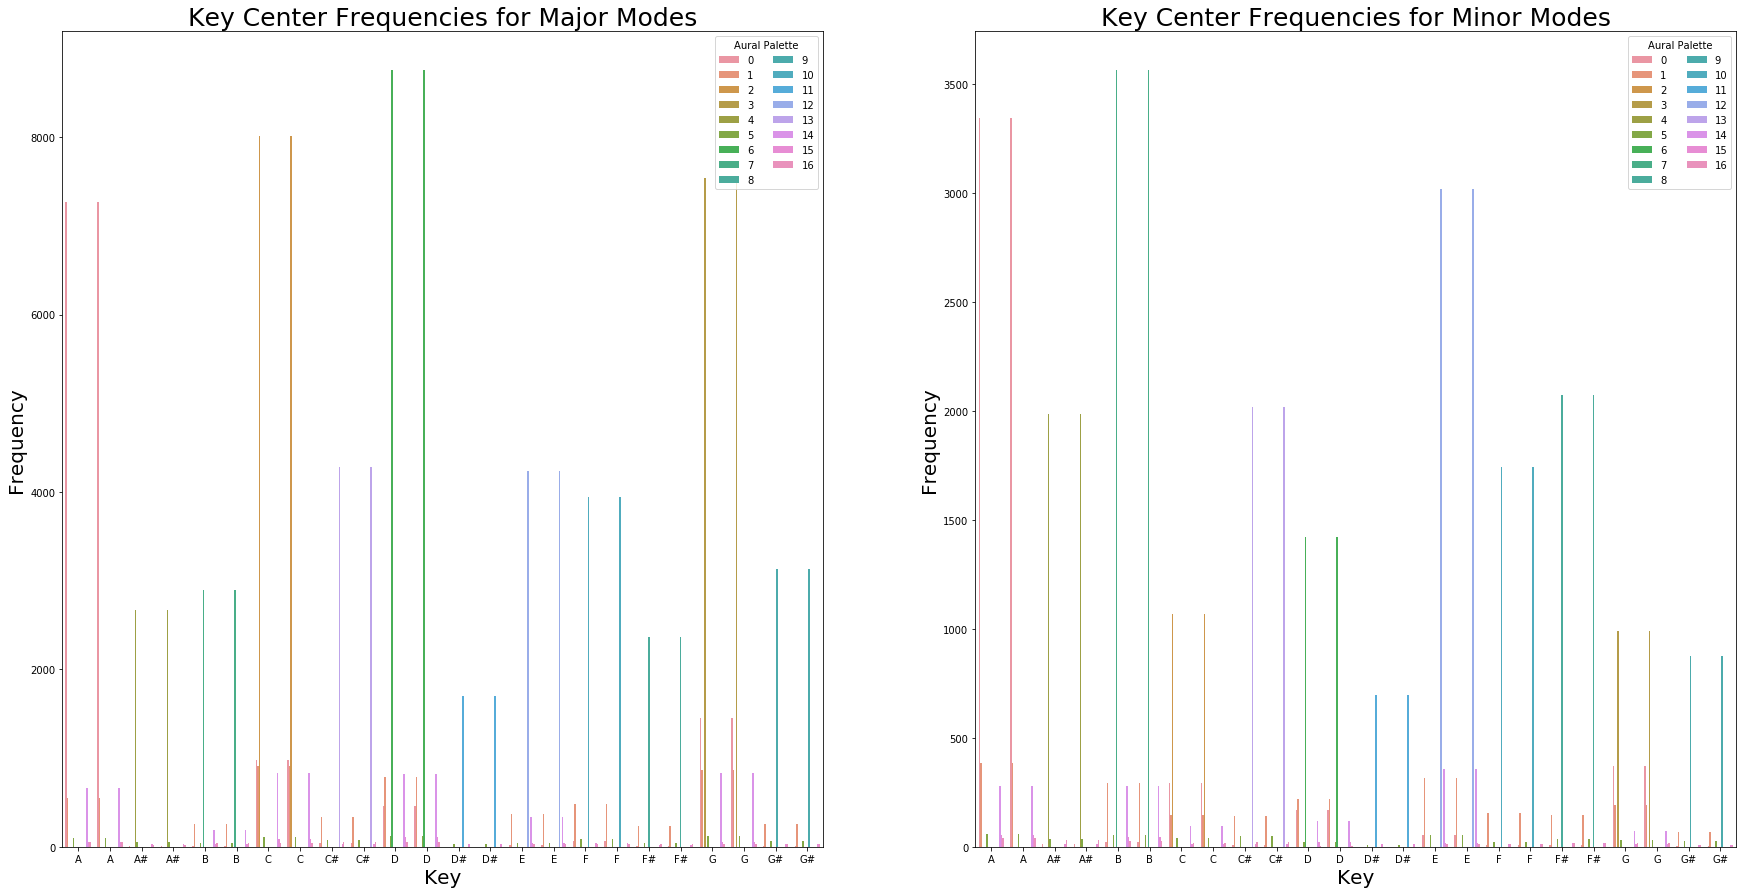

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
sns.countplot(x="key",data=df[(df.is_major==1)], hue="label", order=keys, ax=ax[0])
#Major
ax[0].set_xlabel("Key",size=20)
ax[0].set_ylabel("Frequency",size=20)
ax[0].set_title("Key Center Frequencies for Major Modes", size=25)
ax[0].legend(title="Aural Palette", ncol=2)
#Minor
sns.countplot(x="key",data=df[(df.is_major==0)], hue="label", order=keys, ax=ax[1])
ax[1].set_xlabel("Key",size=20)
ax[1].set_ylabel("Frequency",size=20)
ax[1].set_title("Key Center Frequencies for Minor Modes", size=25)
ax[1].legend(title="Aural Palette", ncol=2)

##### By Key

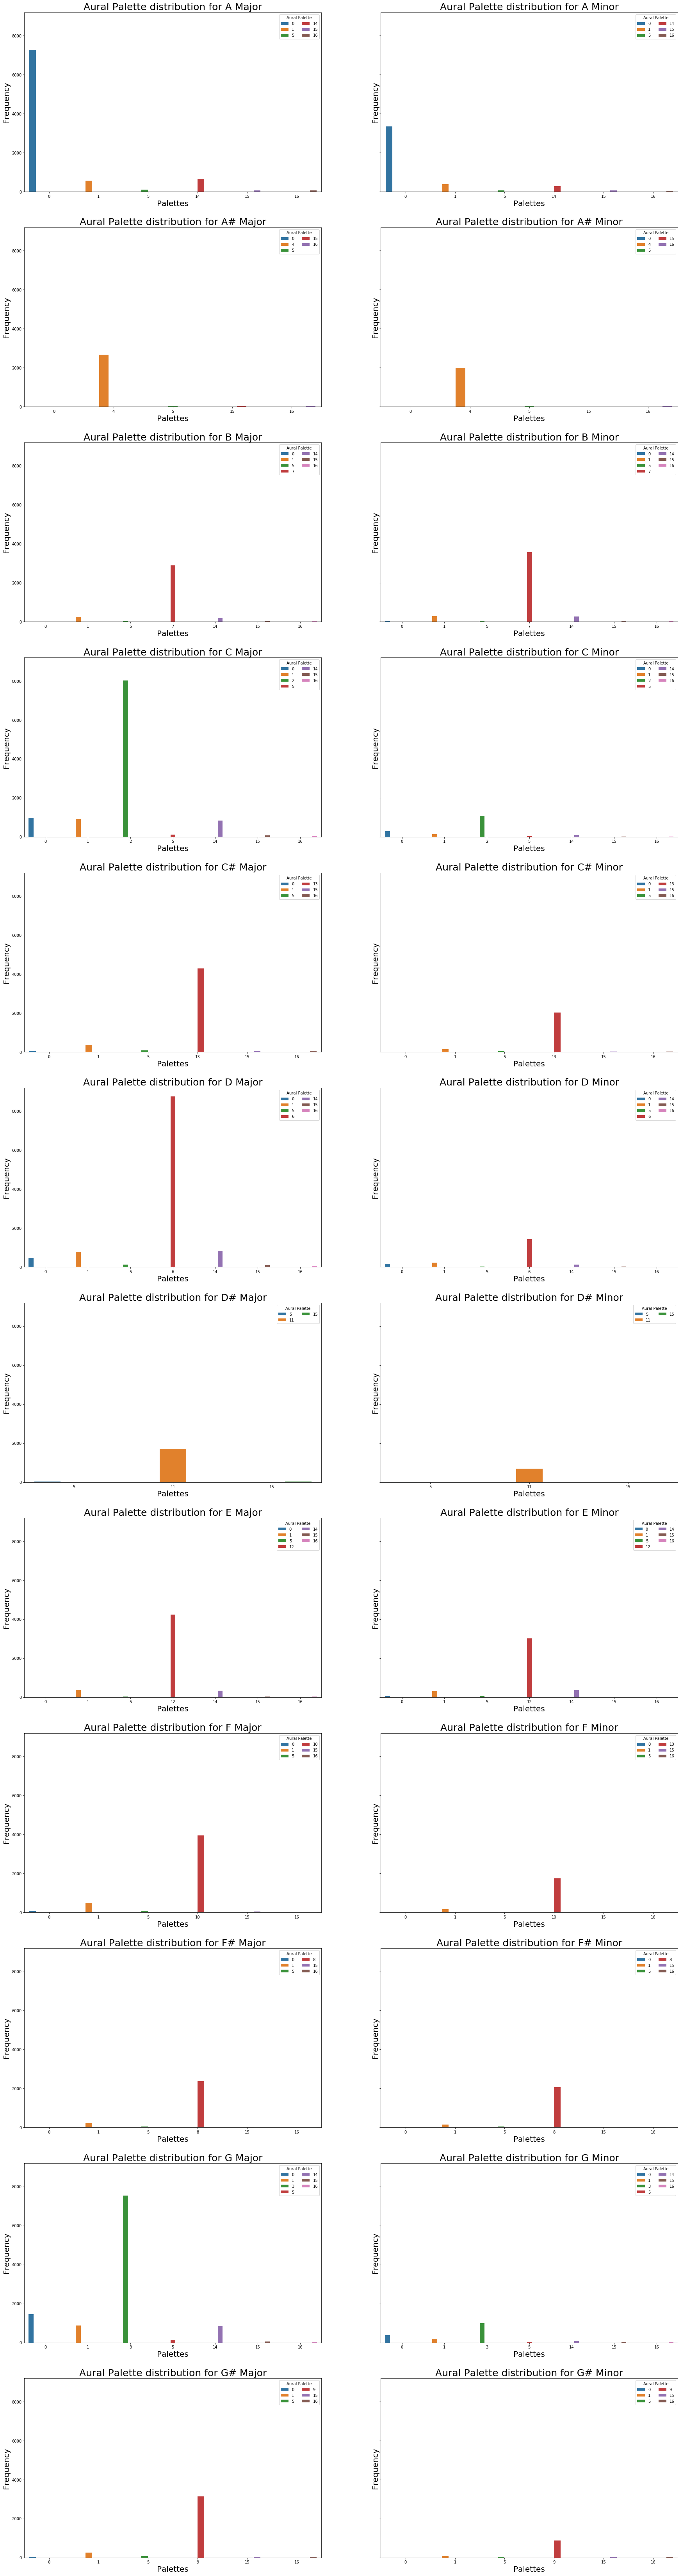

In [89]:
fig, ax = plt.subplots(nrows=12, ncols=2, figsize=(30,120), sharey=True)
keys = list(set(df.key.values))
keys *= 2
keys.sort()
for i, (key, axes) in enumerate(zip(keys, ax.ravel())):
    if i%2 == 0:
        mode = "Major"
        sns.countplot(x="label", data=df[(df["is_major"] == 1) & (df["key"] == key)], hue="label", ax=axes)
    else:
        mode = "Minor"
        sns.countplot(x="label", data=df[(df["is_major"] == 0) & (df["key"] == key)], hue="label", ax=axes)
    axes.set_title(f"Aural Palette distribution for {key} {mode}", size=25)
    axes.set_xlabel("Palettes", size=20)
    axes.set_ylabel("Frequency", size=20)
    axes.legend(title="Aural Palette", ncol=2)

##### By Palette

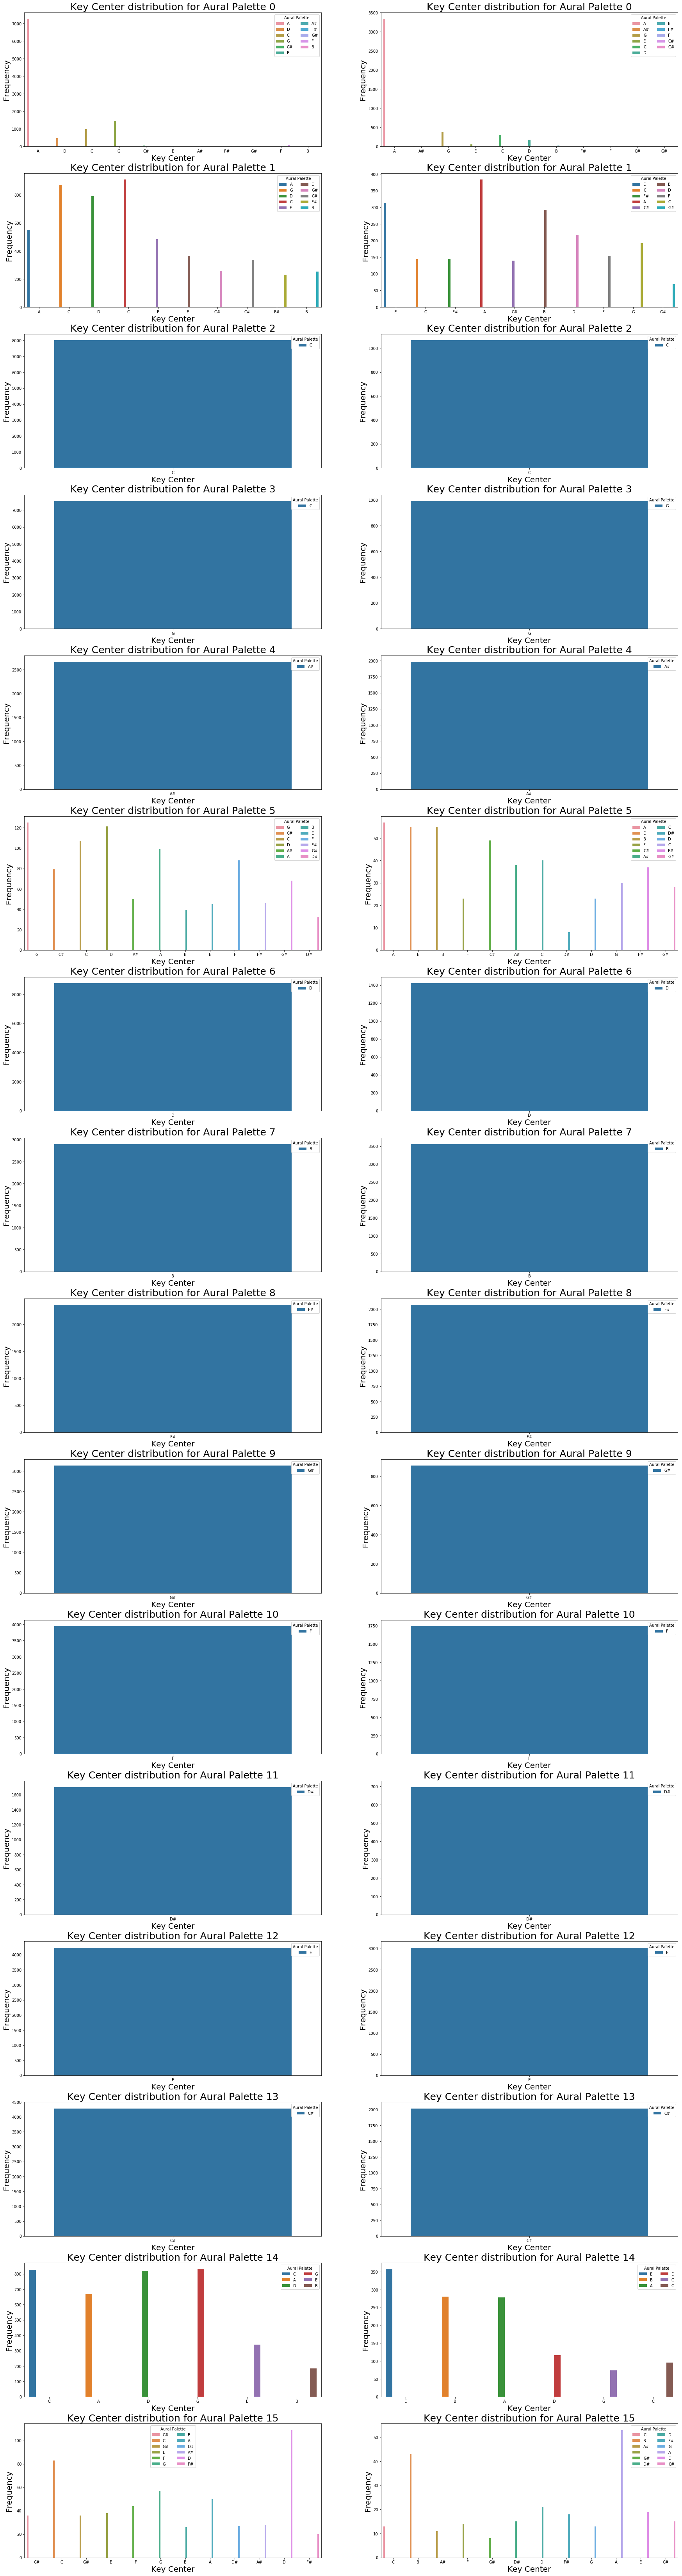

In [100]:
fig, ax = plt.subplots(nrows=16, ncols=2, figsize=(30,120))
palettes = [str(i) for i in range(17)]
palettes *= 2
palettes = [int(i) for i in palettes]
palettes.sort()
for i, (palette, axes) in enumerate(zip(palettes, ax.ravel())):
    if i%2 == 0:
        mode = "Major"
        sns.countplot(x="key", data=df[(df["is_major"] == 1) & (df["label"] == palette)], hue="key", ax=axes)
    else:
        mode = "Minor"
        sns.countplot(x="key", data=df[(df["is_major"] == 0) & (df["label"] == palette)], hue="key", ax=axes)
    axes.set_title(f"Key Center distribution for Aural Palette {palette}", size=25)
    axes.set_xlabel("Key Center", size=20)
    axes.set_ylabel("Frequency", size=20)
    axes.legend(title="Aural Palette", ncol=2)

Some of these single columns suggests the clustering could still use some tuning, but still have some interesting results

### Numerical Features

In [19]:
df.columns

Index(['artist_id', 'artist', 'album_id', 'album_names', 'track_id',
       'track_number', 'track_title', 'track_duration', 'track_disc_number',
       'danceability', 'energy', 'is_major', 'speechiness', 'acousticness',
       'valence', 'tempo', 'is_live', 'is_instrumental', 'label', 'key',
       'time_signature', 'instrumentalness', 'liveness'],
      dtype='object')

In [101]:
numerical = ["track_duration", "danceability","energy","speechiness","acousticness","valence","tempo","instrumentalness","liveness","label"]

/anaconda3/envs/spotidsi/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/spotidsi/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


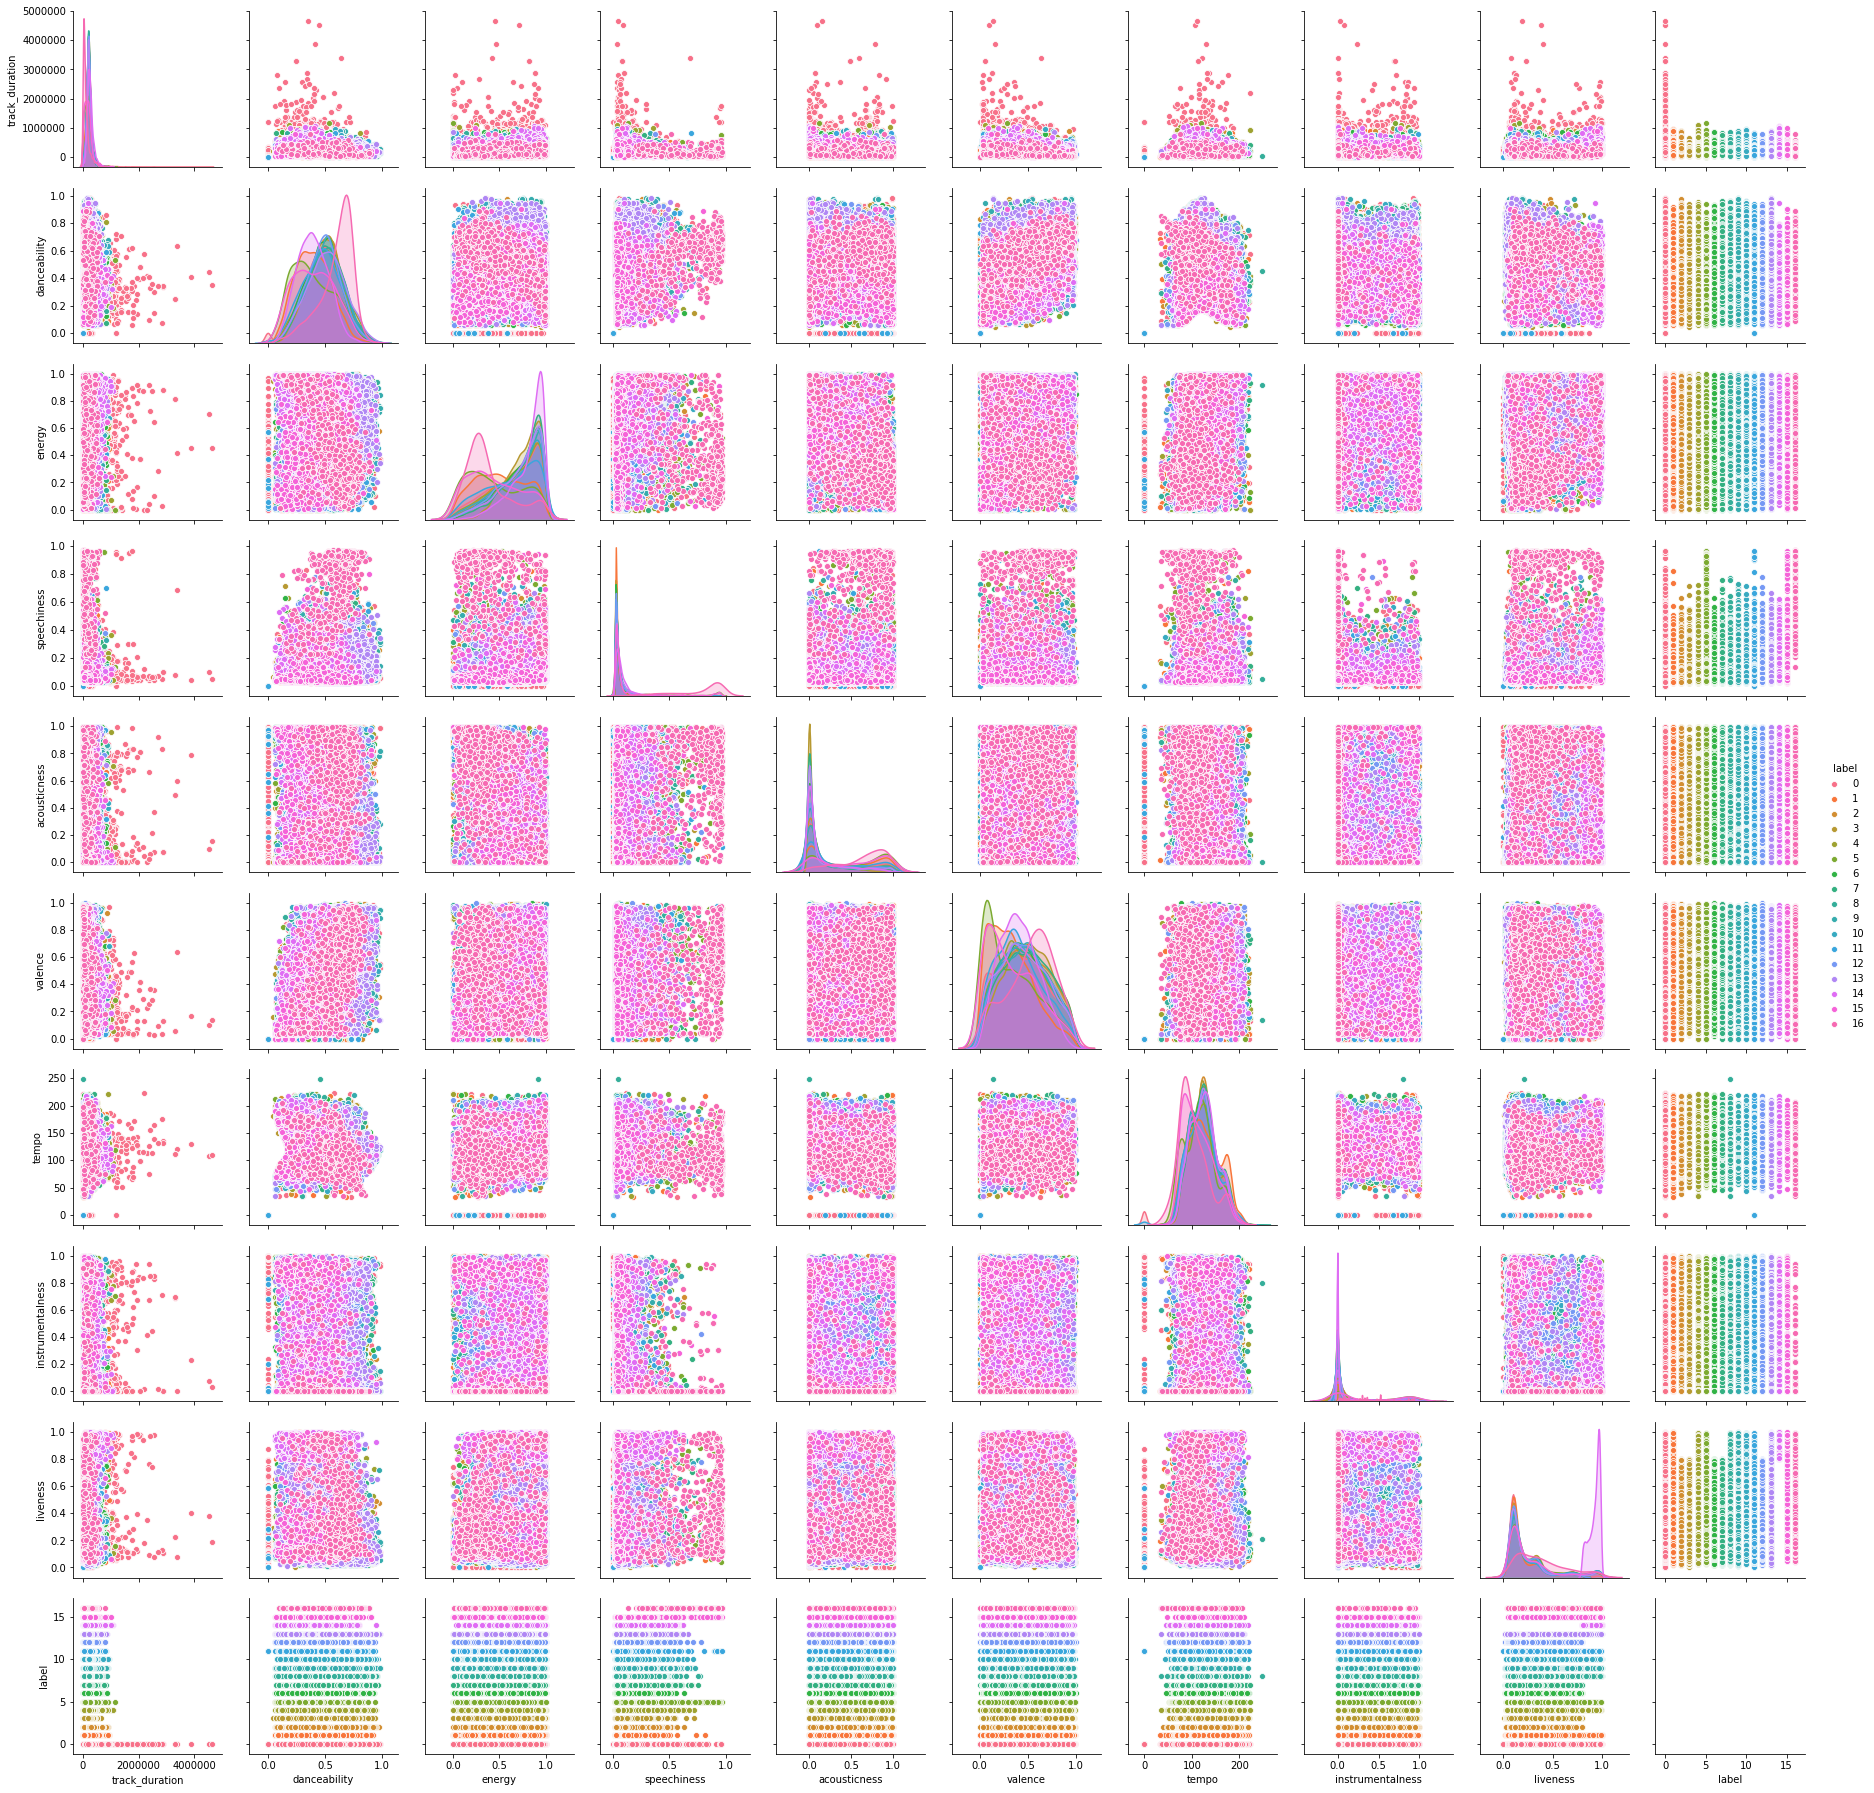

In [102]:
sns.pairplot(df[numerical], hue="label")

## Conclusions

### Remarks on clustering quality

Honestly big conclusions here is that the clustering needs more work, which is not that surprising given the pretty low silhouette score suggesting the clusters were still not that separated.  On the other hand, there are limits to the data that was selected, as it was mostly based off my own library, so there is some selection bias from the start.  The other reality is that music differences tend to be really subtle until songs get very differentianted.  Also, I used $16$ labels to start, but the reality is I expect there to be way more 'useful' clusters than that, so I have doubts on where to cut the dendogram.

There are some more features in the spotify api that I have not incoporated yet, such as `timbre`.  Timbre I am particularly interested in because it describes aural qualities, or how a note feels.  Timbre is the difference in what we hear if a Piano plays a C and a Guitar plays the same octave C, I doubt anyone would have a hard time classifying which belonged to each.  Voices also have a timbre.  But really the principal can compound, and that can create a soundscape.  The difficulty in timbre is dealing with the irregularities between songs, generally individual passages have a timbre rating and obviously every song is going to vary in length and how much it shifts over a song.  

Another point of improvement for the clustering is changing how certain distance metrics are used.  For example, differences in key are illustrated to be pretty prevelant in the clustering, as illustrated in this notebook, but the keys were treated as categorical so distance measuring can be a little weird with them.  However, there are approaches to measure distance in keys, for example, quantifying steps on the cirlce o

I would also like to explore more thorough methodologies for iterating clustering to improve it.  I still believe hieararchical clustering is very promising, but it was pretty hard really improve the model when my resources were limited by the fact that a single iteration really could take quite a while.

### Other Avenues to explore

Once I am more satisified with the clustering, this could connect to a supervised learning problem with the newly labeled data.  With signficant meaning how well can a model start to classify new songs?  
On other topics, I would also like to explore how these aural palettes intersect with genres.  What genres hit the widest variety of palettes?  What genre has even balances in the palettes represented?  What about ones that are absolutely commanded by one or two palettes?  

How about artists in these palettes.  Do bands that have been around for longer stick in one palette, or settle into a final one.  What about bands with very different freshmen and sophmore efforts.  Or bands that are well known for rapidly changing styles, how do they end up intersecting with these palettes?

### Output

In [104]:
df.to_csv("../data/labeled_2.csv")